# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X.shape, y.shape

((442, 10), (442,))

# Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

# Scatter Plot X vs y

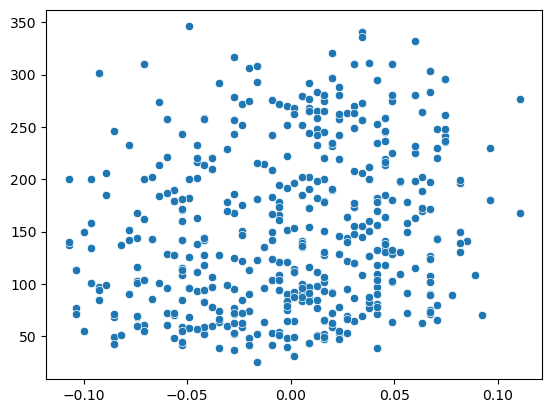

In [6]:
sns.scatterplot(x=X[:, 0], y=y);

# Ridge Regression using sklearn

In [7]:
ridge = Ridge(alpha=0.1, solver='cholesky')

## Fit the model

In [8]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

## Prediction on test data

In [9]:
y_pred_ridge = ridge.predict(X_test)

## R2 Score

In [10]:
print('R2 Score using Sklearn ka Ridge Regression: ', r2_score(y_test, y_pred_ridge))

R2 Score using Sklearn ka Ridge Regression:  0.46085219464119265


## Alpha, Coefficients and Interept

In [11]:
print(f'Alpha: {ridge.alpha}, \nCoefficent: {ridge.coef_}, \nIntercept: {ridge.intercept_}')

Alpha: 0.1, 
Coefficent: [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ], 
Intercept: 151.45857456679613


# Ridge Regression from scratch for n-dimension data

In [12]:
class MyRidge():

    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):

        # Add 1 before X_train (insert 1's at 0th index in X_train)
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Create an Identity matrix of that will have number of columns that X_train has
        I = np.identity(X_train.shape[1])
        
        # Make the first element of Identity Matrix 0 -> Do not regularize the intercept (beta 0)
        I[0][0] = 0

        # (X.T * X + alpha * I) inverse * X.T * Y
        betas = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        
        self.coef_ = betas[1: ]
        self.intercept_ = betas[0]

        print('Coefficient: ', self.coef_)
        print('Intercept: ', self.intercept_)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [13]:
myRidge = MyRidge(alpha=0.1)

## Fit the model

In [14]:
myRidge.fit(X_train, y_train)

Coefficient:  [  42.85566976 -205.49431899  505.08903304  317.0932049  -108.50026183
  -86.23673333 -190.36318008  151.70708637  392.28931896   79.9081772 ]
Intercept:  151.45857456679613


## Prediction on test data

In [15]:
y_pred_my_ridge = myRidge.predict(X_test)

## R2 Score

In [16]:
print('R2 Score using My Ridge Regression: ', r2_score(y_test, y_pred_my_ridge))

R2 Score using My Ridge Regression:  0.46085219464119254


# Comparing coefficents of Sklearn's Ridge vs MyRidge

In [17]:
ridge.coef_

array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
       -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
        392.28931896,   79.9081772 ])

In [18]:
myRidge.coef_

array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
       -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
        392.28931896,   79.9081772 ])

In [19]:
ridge.coef_ is myRidge.coef_

False

# Visualize the best fit lines

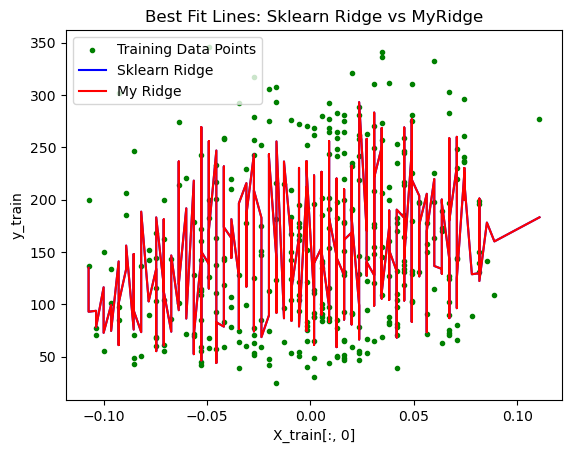

In [20]:
# Sort X_train by the chosen feature for plotting
sort_idx = X_train[:, 0].argsort()
X_sorted = X_train[sort_idx]
y_sorted = y_train[sort_idx]

# Predictions (using sorted X)
y_pred_sklearn = ridge.predict(X_sorted)
y_pred_myridge = myRidge.predict(X_sorted)

plt.scatter(X_train[:, 0], y_train, c='green', marker='.', label='Training Data Points')
plt.plot(X_sorted[:, 0], y_pred_sklearn, color='blue', linestyle='-', label='Sklearn Ridge')
plt.plot(X_sorted[:, 0], y_pred_myridge, color='red', linestyle='-', label='My Ridge')
plt.xlabel('X_train[:, 0]')
plt.ylabel('y_train')
plt.title('Best Fit Lines: Sklearn Ridge vs MyRidge')
plt.legend()
plt.show()